In [3]:
import json
from PIL import Image, ImageDraw 
import matplotlib.pyplot as plt
import pandas as pd

## Config Directories

In [17]:
#BDD Annotation
vgRoot = 'VisualGenome/'

vgSG = vgRoot+'Annotation/scene_graphs.json'
vgAttr = vgRoot+'Annotation/attributes.json'


In [7]:
fSG = open(vgSG)
dataSG = json.load(fSG)
len(dataSG)

108077

In [8]:
fAttr = open(vgAttr)
dataAttr = json.load(fAttr)
len(dataAttr)

108077

In [11]:
dataItemSG = dataSG[0]
dataItemSG

{'relationships': [{'synsets': ['along.r.01'],
   'predicate': 'ON',
   'relationship_id': 15927,
   'object_id': 5046,
   'subject_id': 5045},
  {'synsets': ['wear.v.01'],
   'predicate': 'wears',
   'relationship_id': 15928,
   'object_id': 5048,
   'subject_id': 1058529},
  {'synsets': ['have.v.01'],
   'predicate': 'has',
   'relationship_id': 15929,
   'object_id': 5050,
   'subject_id': 5049},
  {'synsets': ['along.r.01'],
   'predicate': 'ON',
   'relationship_id': 15930,
   'object_id': 1058508,
   'subject_id': 1058507},
  {'synsets': ['along.r.01'],
   'predicate': 'ON',
   'relationship_id': 15931,
   'object_id': 1058534,
   'subject_id': 5055},
  {'synsets': ['have.v.01'],
   'predicate': 'has',
   'relationship_id': 15932,
   'object_id': 1058511,
   'subject_id': 1058529},
  {'synsets': ['next.r.01'],
   'predicate': 'next to',
   'relationship_id': 15933,
   'object_id': 1058539,
   'subject_id': 1058534},
  {'synsets': ['have.v.01'],
   'predicate': 'has',
   'relation

In [9]:
dataItemAttr = dataAttr[0]
dataItemAttr

{'image_id': 1,
 'attributes': [{'synsets': ['clock.n.01'],
   'h': 339,
   'object_id': 1058498,
   'names': ['clock'],
   'w': 79,
   'attributes': ['green', 'tall'],
   'y': 91,
   'x': 421},
  {'synsets': ['street.n.01'],
   'h': 262,
   'object_id': 5046,
   'names': ['street'],
   'w': 714,
   'attributes': ['sidewalk'],
   'y': 328,
   'x': 77},
  {'synsets': ['shade.n.01'],
   'h': 192,
   'object_id': 5045,
   'names': ['shade'],
   'w': 274,
   'y': 338,
   'x': 119},
  {'synsets': ['man.n.01'],
   'h': 262,
   'object_id': 1058529,
   'names': ['man'],
   'w': 60,
   'y': 249,
   'x': 238},
  {'synsets': ['gym_shoe.n.01'],
   'h': 26,
   'object_id': 5048,
   'names': ['sneakers'],
   'w': 52,
   'attributes': ['grey'],
   'y': 489,
   'x': 243},
  {'synsets': ['headlight.n.01'],
   'h': 15,
   'object_id': 5050,
   'names': ['headlight'],
   'w': 23,
   'attributes': ['off'],
   'y': 366,
   'x': 514},
  {'synsets': ['car.n.01'],
   'h': 98,
   'object_id': 5049,
   'names'

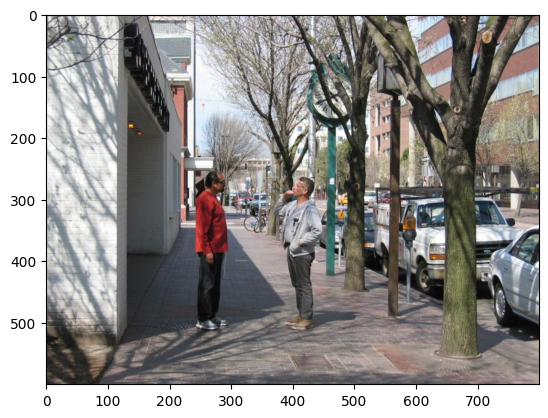

In [10]:
vgRootImage = 'VisualGenome/VG_100K/'
image = Image.open(vgRootImage+str(dataItemAttr['image_id'])+'.jpg')
plt.imshow(image)
# /home/duypd/ThisPC-DuyPC/Traffic-SceneGraph-Generation/Traffic-SceneGraph-Generation/Datasets/BDD/BDD100K/images/100k/train

421 91 79 339 clock
77 328 714 262 street
119 338 274 192 shade
238 249 60 262 man
243 489 52 26 sneakers
514 366 23 15 headlight
479 315 74 98 car
318 319 28 34 bike
334 319 29 35 bike
118 13 88 182 sign
1 2 218 536 building
622 234 87 327 tree trunk
77 331 722 266 sidewalk
241 289 59 101 shirt
358 283 440 233 street
708 342 91 174 car
721 339 67 170 back
271 268 20 12 glasses
574 327 32 143 parking meter
391 481 46 34 shoes
372 264 75 251 man
245 384 38 118 pants
356 296 89 97 jacket
382 369 54 128 pants
521 271 265 185 work truck
343 318 50 189 sidewalk
399 288 11 9 chin
369 264 82 250 guy
529 298 233 134 van
0 1 134 533 wall


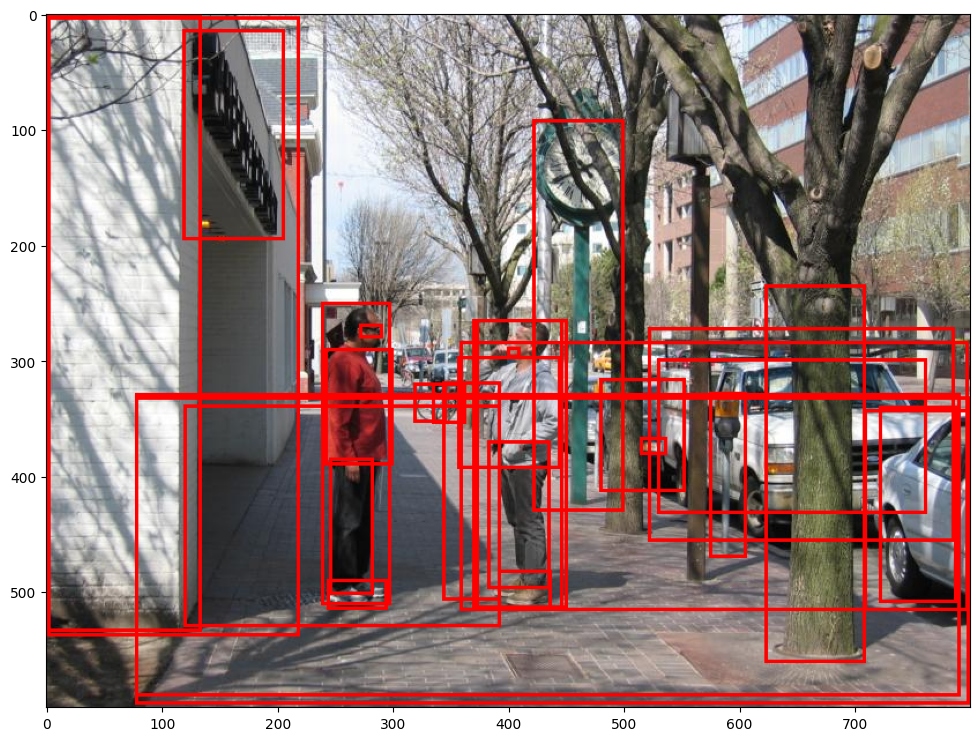

In [11]:
imCopy = image.copy()
imageDraw = ImageDraw.Draw(imCopy)
for item in dataItemAttr['attributes'][:30]:
    x1, y1, x2, y2 = item['x'], item['y'], item['w'], item['h']
    print(x1, y1, x2, y2, item['names'][0])
    
    imageDraw.rectangle([(x1, y1), (x2+x1, y2+y1)], outline ="red", width=3) 
    # if('poly2d' in item.keys()):
    #     print(item['poly2d'][0]['vertices'])
    #     converted_list = [tuple(item) for item in item['poly2d'][0]['vertices']]
    #     poly2d = converted_list
    #     imageDraw.polygon(poly2d, outline ="red", fill="#BEF7ED", width=2) 
plt.figure(figsize=(16,9))
plt.imshow(imCopy)
        

In [22]:
objects = []
for image in dataAttr:
    for object in image['attributes']:
        objects.append({'id': object['object_id'], 'name': object['names'][0].replace('|', '').replace(',', '').replace('   ', '')})

# Convert to DataFrame
df = pd.DataFrame(objects)

# Save to CSV
df.to_csv(vgRoot + 'visualgenome_objects.csv', index=False)

Error: need to escape, but no escapechar set